In [4]:
%load_ext autoreload
%autoreload 2
%env CUDA_VISIBLE_DEVICES=0
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os
import pickle
import sys
sys.path.append("..")
from scripts.utils import get_path
from vis_utils.loaders import load_dataset
from vis_utils.plot import hists_from_graph_embd, plot_scatter

env: CUDA_VISIBLE_DEVICES=0


In [5]:
root_path = get_path("data")
fig_path = get_path("figures")

In [6]:
dataset = "mnist"
k=15
nbs_noise = [5, 50, 500]
batch_size = 1024
parametric = False
optimizer = "sgd"
loss_mode = "infonce"
rescale = 1.0
clamp_low = 1e-10
lr_min_factor = 0.0
momentum = 0.0
anneal_lr = True
seed = 0

In [7]:
# set up matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams["font.family"] = "serif"
plt.rcParams['font.serif'] = "Times New Roman"
cmap = matplotlib.cm.get_cmap("tab10")

In [8]:
# get data
x, y, sknn_graph, pca2 = load_dataset(root_path, dataset)

## vary n_noise

In [9]:
n_epochs = 750
init = "pca"
embedders = []
recalls = []
s_corrs = []

for n_noise in nbs_noise:
    file_name = os.path.join(root_path,
                             dataset,
                             f"cne_{loss_mode}_n_noise_{n_noise}_n_epochs_{n_epochs}_init_{init}_rescale_{rescale}_bs_{batch_size}"
                             f"_optim_{optimizer}_anneal_lr_{anneal_lr}_lr_min_factor_{lr_min_factor}_momentum_{momentum}_param_{parametric}_clamp_low_{clamp_low}_seed_{seed}.pkl")
    with open(file_name, "rb") as file:
        embedder = pickle.load(file)

    embedders.append(embedder)

    file_name_recall = os.path.join(root_path,
                                                dataset,f"cne_{loss_mode}_n_noise_{n_noise}_n_epochs_{n_epochs}_init_{init}_rescale_{rescale}_bs_{batch_size}"                                                f"_optim_{optimizer}_anneal_lr_{anneal_lr}_lr_min_factor_{lr_min_factor}_momentum_{momentum}_param_{parametric}_clamp_low_{clamp_low}_recall.pkl"
                                                )
    with open(file_name_recall, "rb") as file:
        recall_dict = pickle.load(file)
    recalls.append(recall_dict["recalls"])

    file_name_s_corrs = os.path.join(root_path,
                                     dataset,f"cne_{loss_mode}_n_noise_{n_noise}_n_epochs_{n_epochs}_init_{init}_rescale_{rescale}_bs_{batch_size}"                                                f"_optim_{optimizer}_anneal_lr_{anneal_lr}_lr_min_factor_{lr_min_factor}_momentum_{momentum}_param_{parametric}_clamp_low_{clamp_low}_s_corr.pkl"
                                     )
    with open(file_name_s_corrs, "rb") as file:
        s_corrs_dict = pickle.load(file)
    s_corrs.append(s_corrs_dict["s_corrs"])



    print(f"done with n_noise={n_noise}")

recalls = np.stack(recalls)
s_corrs = np.stack(s_corrs)

done with n_noise=5
done with n_noise=50
done with n_noise=500


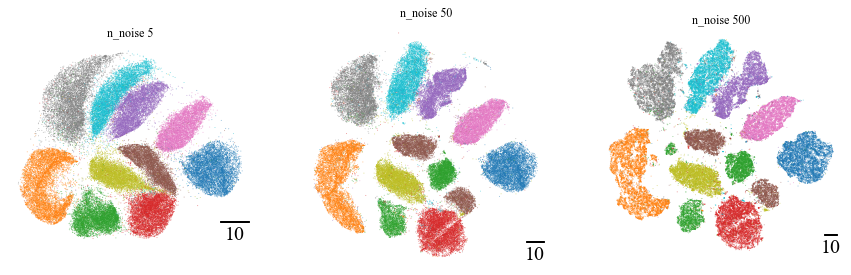

In [10]:
epoch = -1
fig, ax = plt.subplots(1, 3, figsize=(15,15))
for i in range(len(embedders)):
    embd = embedders[i].callback.embds[epoch]
    cax = ax[i]
    plot_scatter(cax, embd, y, f"n_noise {nbs_noise[i]}")


In [11]:
epoch = -1
for i in range(len(embedders)):
    plt.figure(figsize=(5,5))
    embd = embedders[i].callback.embds[epoch]
    plot_scatter(plt.gca(), embd, y)
    plt.text(0.8, 0.8, rf"kNN: $\:\: {recalls[i].mean():.2f}$"+"\n"
                       rf"Spear: {s_corrs[i].mean():.2f}",
             transform=plt.gca().transAxes, fontsize=20)
    plt.savefig(os.path.join(fig_path,
                         f"infonce_no_EE_m_{nbs_noise[i]}.png"),
            bbox_inches='tight',
            pad_inches=0,
            dpi=200,
            transparent=False,
            facecolor='white')
    plt.close()

## early exaggeration

In [12]:
nbs_noise = [5, 50, 500]
n_epochs = 500
init = "EE"

embedders = []
recalls = []
s_corrs = []

for n_noise in nbs_noise:
    file_name = os.path.join(root_path,
                             dataset,
                             f"cne_{loss_mode}_n_noise_{n_noise}_n_epochs_{n_epochs}_init_{init}_bs_{batch_size}"
                             f"_optim_{optimizer}_anneal_lr_{anneal_lr}_lr_min_factor_{lr_min_factor}_momentum_{momentum}_param_{parametric}_clamp_low_{clamp_low}_seed_{seed}.pkl")
    with open(file_name, "rb") as file:
        embedder = pickle.load(file)

    embedders.append(embedder)

    file_name_recall = os.path.join(root_path,
                                                dataset,f"cne_{loss_mode}_n_noise_{n_noise}_n_epochs_{n_epochs}_init_{init}_bs_{batch_size}"                                                f"_optim_{optimizer}_anneal_lr_{anneal_lr}_lr_min_factor_{lr_min_factor}_momentum_{momentum}_param_{parametric}_clamp_low_{clamp_low}_recall.pkl"
                                                )
    with open(file_name_recall, "rb") as file:
        recall_dict = pickle.load(file)
    recalls.append(recall_dict["recalls"])

    file_name_s_corrs = os.path.join(root_path,
                                     dataset,f"cne_{loss_mode}_n_noise_{n_noise}_n_epochs_{n_epochs}_init_{init}_bs_{batch_size}"                                                f"_optim_{optimizer}_anneal_lr_{anneal_lr}_lr_min_factor_{lr_min_factor}_momentum_{momentum}_param_{parametric}_clamp_low_{clamp_low}_s_corr.pkl"
                                     )
    with open(file_name_s_corrs, "rb") as file:
        s_corrs_dict = pickle.load(file)
    s_corrs.append(s_corrs_dict["s_corrs"])



    print(f"done with n_noise={n_noise}")

recalls = np.stack(recalls)
s_corrs = np.stack(s_corrs)

done with n_noise=5
done with n_noise=50
done with n_noise=500


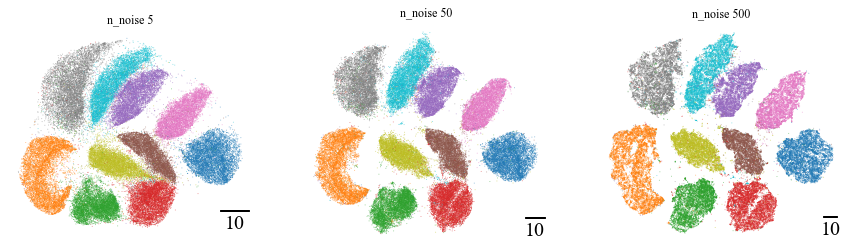

In [13]:
epoch = -1
fig, ax = plt.subplots(1, 3, figsize=(15,15))
for i in range(len(embedders)):
    embd = embedders[i].callback.embds[epoch]
    cax = ax[i]
    plot_scatter(cax, embd, y, f"n_noise {nbs_noise[i]}")


In [14]:
epoch = -1
for i in range(len(embedders)):
    plt.figure(figsize=(5,5))
    embd = embedders[i].callback.embds[epoch]
    plot_scatter(plt.gca(), embd, y)
    plt.text(0.8, 0.8, rf"kNN: $\:\: {recalls[i].mean():.2f}$"+"\n"
                       rf"Spear: {s_corrs[i].mean():.2f}",
             transform=plt.gca().transAxes, fontsize=20)
    plt.savefig(os.path.join(fig_path,
                         f"infonce_m_{nbs_noise[i]}.png"),
            bbox_inches='tight',
            pad_inches=0,
            dpi=200,
            transparent=False,
            facecolor='white')
    plt.close()

## random init

In [15]:
nbs_noise = [5, 50, 500]
n_epochs = 750
init="random"
embedders = []
recalls = []
s_corrs = []

for n_noise in nbs_noise:
    file_name = os.path.join(root_path,
                             dataset,
                             f"cne_{loss_mode}_n_noise_{n_noise}_n_epochs_{n_epochs}_init_{init}_rescale_{rescale}_bs_{batch_size}"
                             f"_optim_{optimizer}_anneal_lr_{anneal_lr}_lr_min_factor_{lr_min_factor}_momentum_{momentum}_param_{parametric}_clamp_low_{clamp_low}_seed_{seed}.pkl")
    with open(file_name, "rb") as file:
        embedder = pickle.load(file)

    embedders.append(embedder)

    file_name_recall = os.path.join(root_path,
                                                dataset,f"cne_{loss_mode}_n_noise_{n_noise}_n_epochs_{n_epochs}_init_{init}_rescale_{rescale}_bs_{batch_size}"                                                f"_optim_{optimizer}_anneal_lr_{anneal_lr}_lr_min_factor_{lr_min_factor}_momentum_{momentum}_param_{parametric}_clamp_low_{clamp_low}_recall.pkl"
                                                )
    with open(file_name_recall, "rb") as file:
        recall_dict = pickle.load(file)
    recalls.append(recall_dict["recalls"])

    file_name_s_corrs = os.path.join(root_path,
                                     dataset,f"cne_{loss_mode}_n_noise_{n_noise}_n_epochs_{n_epochs}_init_{init}_rescale_{rescale}_bs_{batch_size}"                                                f"_optim_{optimizer}_anneal_lr_{anneal_lr}_lr_min_factor_{lr_min_factor}_momentum_{momentum}_param_{parametric}_clamp_low_{clamp_low}_s_corr.pkl"
                                     )
    with open(file_name_s_corrs, "rb") as file:
        s_corrs_dict = pickle.load(file)
    s_corrs.append(s_corrs_dict["s_corrs"])



    print(f"done with n_noise={n_noise}")

recalls = np.stack(recalls)
s_corrs = np.stack(s_corrs)

done with n_noise=5
done with n_noise=50
done with n_noise=500


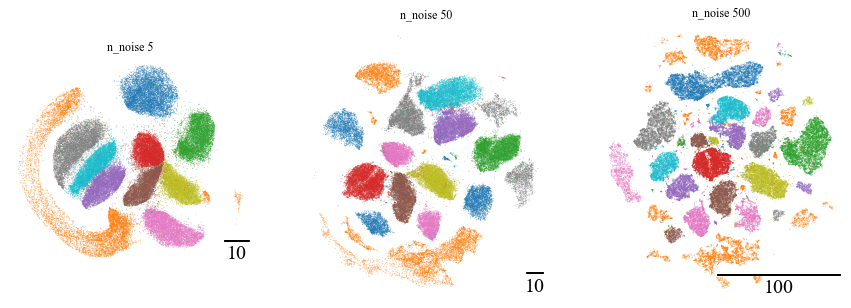

In [16]:
epoch = -1
fig, ax = plt.subplots(1, 3, figsize=(15,15))
for i in range(len(embedders)):
    embd = embedders[i].callback.embds[epoch]
    cax = ax[i]
    plot_scatter(cax, embd, y, f"n_noise {nbs_noise[i]}")

In [17]:
epoch = -1
for i in range(len(embedders)):
    plt.figure(figsize=(5,5))
    embd = embedders[i].callback.embds[epoch]
    plot_scatter(plt.gca(), embd, y)
    plt.text(0.8, 0.8, rf"kNN: $\:\: {recalls[i].mean():.2f}$"+"\n"
                       rf"Spear: {s_corrs[i].mean():.2f}",
             transform=plt.gca().transAxes, fontsize=20)
    plt.savefig(os.path.join(fig_path,
                         f"infonce_random_m_{nbs_noise[i]}.png"),
            bbox_inches='tight',
            pad_inches=0,
            dpi=200,
            transparent=False,
            facecolor='white')
    plt.close()